## Разделение задач

Отличный план проекта! Чтобы эффективно распределить задачи между пятью участниками команды, можно разбить проект на функциональные блоки. Каждому участнику или паре участников можно поручить ответственность за отдельный модуль работы.

Ниже представлен вариант декомпозиции проекта на более мелкие и конкретные задачи.

### Модуль 1: Подготовка инфраструктуры и данных (Ответственный: 1 человек)

Этот блок закладывает фундамент для всего исследования.

*   **Задача 1.1: Анализ и выбор датасета**
    *   Провести сравнительный анализ MSR-VTT, ActivityNet Captions и DiDeMo по критериям: размер, качество аннотаций, доступность и сложность предобработки.
    *   Представить команде обоснование для выбора одного датасета и утвердить его.
*   **Задача 1.2: Подготовка данных**
    *   Написать скрипты для скачивания и валидации видео и текстовых аннотаций.
    *   Реализовать предобработку видео (например, приведение к единому FPS и разрешению) и текста.
    *   Организовать хранение данных в удобной для всех структуре.
*   **Задача 1.3: Развертывание окружения**
    *   Создать и поддерживать общее рабочее окружение (например, через Docker или `requirements.txt`).
    *   Установить и настроить векторную базу данных FAISS. Подготовить базовые скрипты для добавления векторов и поиска.

### Модуль 2: Pipeline для CLIP-like моделей (Ответственный: 1 человек)

Фокус на первой архитектуре — моделях контрастивного обучения.

*   **Задача 2.1: Выбор и интеграция моделей**
    *   Исследовать и выбрать 2-3 конкретные предобученные CLIP-like модели для видео (например, CLIP4Clip, VideoCLIP).
    *   Написать скрипты-обертки для загрузки моделей и получения эмбеддингов для видео и текста.
*   **Задача 2.2: Запуск экспериментов**
    *   Сгенерировать эмбеддинги для всех видео из тестовой выборки.
    *   Сгенерировать эмбеддинги для соответствующих текстовых описаний.
    *   Сохранить полученные векторы для дальнейшего анализа.

### Модуль 3: Pipeline для Captioning + LLM (Ответственный: 1 человек)

Фокус на второй, гибридной архитектуре.

*   **Задача 3.1: Выбор и интеграция моделей**
    *   Подобрать и протестировать предобученную модель для генерации описаний видео (Video Captioning).
    *   Выбрать модель для получения текстовых эмбеддингов из сгенерированных описаний (например, Sentence-BERT).
*   **Задача 3.2: Создание и запуск пайплайна**
    *   Реализовать сквозной пайплайн: на вход видео -> генерация описания -> получение эмбеддинга.
    *   Применить пайплайн ко всем видео из датасета и сохранить эмбеддинги.

### Модуль 4: Pipeline для VideoMAE и кластеризация (Ответственный: 1 человек)

Задачи, связанные с self-supervised подходом и анализом группировки данных.

*   **Задача 4.1: Интеграция VideoMAE**
    *   Найти и интегрировать предобученную модель VideoMAE.
    *   Написать скрипт для извлечения эмбеддингов из видео.
*   **Задача 4.2: Получение эмбеддингов VideoMAE**
    *   Сгенерировать и сохранить эмбеддинги для всех видео с помощью VideoMAE.

### Модуль 5: Оценка, визуализация и подготовка отчета (Ответственный: 1 человек)

Этот участник собирает результаты со всех модулей и финализирует анализ.

*   **Задача 5.0: Реализация кластеризации**
    *   Применить алгоритмы кластеризации (например, K-Means) к эмбеддингам, полученным из *всех трёх архитектур* (CLIP-like, Captioning, VideoMAE).
    *   Написать скрипты для расчета метрик ARI и NMI, используя ground-truth категории видео из датасета.
*   **Задача 5.1: Оценка задачи Video Retrieval**
    *   Используя эмбеддинги из Модулей 2 и 3, провести эксперимент по поиску видео по текстовому запросу.
    *   Реализовать расчет метрик Recall@K и Median Rank.
*   **Задача 5.2: Анализ пространства представлений**
    *   Написать скрипты для визуализации эмбеддингов всех моделей с помощью t-SNE и UMAP.
    *   Реализовать функцию для вычисления ранга матрицы эмбеддингов для каждой модели.
*   **Задача 5.3: Сведение результатов и написание отчета**
    *   Собрать все метрики (Retrieval, Clustering) в итоговые таблицы и графики.
    *   Координировать написание финального отчета, где каждый ответственный за модуль описывает свою часть работы и результаты.
    *   Сформулировать общие выводы проекта.

## Датасеты


### 1. MSR-VTT (Microsoft Research Video to Text)
[HuggingFace](https://huggingface.co/datasets/friedrichor/MSR-VTT)

Большой датасет с разнообразными видео из 20 категорий. Можно взять за основу. Описания видео кратко сформулорованы, в трейн часте много разных фариантов описаний каждого видео (перефразировки). Длительность клипов 10–30 c

```json
{
  "video_id": "video0",
  "video": "video0.mp4",
  "category_map": {
    "0": "music",
    "1": "people",
    "2": "gaming",
    "3": "sports",
    "4": "news",
    "5": "education",
    "6": "TV shows",
    "7": "movie",
    "8": "animation",
    "9": "vehicles",
    "10": "travel",
    "11": "science",
    "12": "animals",
    "13": "kids",
    "14": "food",
    "15": "cooking",
    "16": "beauty",
    "17": "fashion",
    "18": "documentary",
    "19": "ads"
  }
  "url": "https://www.youtube.com/watch?v=...",
  "start_time": 10.0,
  "end_time": 30.0,
  "caption": "a girl is playing a guitar",
  "sen_id": 1500
}
```

Train:
* train_7k: 7,010 videos, 140,200 captions
* train_9k: 9,000 videos, 180,000 captions

Test:
* test_1k: 1,000 videos, 1,000 captions

***

### 2. VATEX (In-the-Wild Multilingual)
Чистая версия: [HuggingFace](https://huggingface.co/datasets/VLM2Vec/VATEX). Оригинальная версия: [HuggingFace](https://huggingface.co/datasets/HuggingFaceM4/vatex)

Все видео про людей (Human Actions). Каждый элемент содержит 10 описаний (в оригинальном варианте есть английские и китайские варианты описаний).

```json
{
  "videoID": "V_001",
  "enCap": [
    "A person is doing pushups on a floor with good form...",
    "Man exercising in a gym doing pushups...",
    ...
  ],
}
```

* test: 4,480 videos

***

### 3. YouCook2 (Instructional / Procedural)
[HuggingFace](https://huggingface.co/datasets/lmms-lab/YouCook2)

Видео про кулинарию, но можно взять небольшую часть. Некоторые видео слишком длинные, берем только короткие. Только один вариант описения

```json
{
  "id": "xHr8X2Wpmno_0",
  "video_url": "https://www.youtube.com/watch?v=...",
  "recipe_type": 266,
  "segment": [47, 60],
  "sentence": "pick the ends off the verdalago",
  "video_path": "val/xHr8X2Wpmno_0.mp4",
  "youtube_id": "xHr8X2Wpmno",
}
```

* val: 3,180 videos
* test: 1,470 videos

***

### Отклоненные датасеты

1.  **ActivityNet Captions** [HuggingFace](https://huggingface.co/datasets/HuggingFaceM4/ActivitiyNet_Captions)
    *   Слишком длинные видео.
2.  **HowTo100M** [HuggingFace](https://huggingface.co/datasets/HuggingFaceM4/howto100m)
    *   Подходит только для Pre-training. Данные слишком грязные
3.  **DiDeMo** [HuggingFace](https://huggingface.co/datasets/friedrichor/DiDeMo)
    *   Слишком длинные видео. 
4.  **Kinetics-400/600** [Kaggle](https://www.kaggle.com/datasets/rohanmallick/kinetics-train-5per)
    *   500k видно, но без описания


Загрузка эмбедингов, полученных моделями на разных датасетах

In [7]:
import os
import pickle
from pathlib import Path

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from pathlib import Path
import numpy as np

from src.data_loader import load_dataset_embeddings
from src.clustering import evaluate_clustering
from src.retrieval import evaluate_retrieval
from src.visualization import compute_rank


DIRS = {
    "xclip": "clip",
    "siglip": "clip",
    "qwen3": "vlm",
    "videomae": "video-mae"
}

DATASETS = ["msrvtt", "vatex", "youcook2"]
MODELS = ["xclip", "siglip", "qwen3", "videomae"]

MODES = ["all", "retrieval", "embedding"]
EMBED_DIR = "./embedings/"
VLM_DIR = EMBED_DIR + "vlm/"
CLIP_DIR = EMBED_DIR + "clip/"
MAE_DIR = EMBED_DIR + "video-mae/"
embed_dir = CLIP_DIR
dataset = "msrvtt"
model = "xclip"

def whatup(model, dataset, mode="all"):
    assert mode in MODES, mode
    embed_dir = EMBED_DIR + DIRS[model] + '/'
    advanced = True
    
    video_embs, text_embs, categories, df = load_dataset_embeddings(embed_dir, dataset, model)
    

    print(f"\n{'='*60}")
    print(f"Dataset: {dataset.upper()} | Model: {model.upper()}")
    print('='*60)

    if not "mae" in model and mode in ["all", "retrieval"]:
        print("\n--- Retrieval Metrics ---")
        metrics = evaluate_retrieval(video_embs, text_embs, k_values=[1, 5, 10], 
                                     advanced=advanced)
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

    if mode in ["all", "embedding"]:
        print("\n--- Embedding Space Analysis ---")
        print(f"Video embeddings: {video_embs.shape if video_embs is not None else None}")
        print(f"Text embeddings: {text_embs.shape if text_embs is not None else None}")
    
        if video_embs is not None:
            rank = compute_rank(video_embs)
            print(f"Matrix rank (video): {rank}/{video_embs.shape[1]}")
        if text_embs is not None:
            rank_text = compute_rank(text_embs)
            print(f"Matrix rank (text): {rank_text}/{text_embs.shape[1]}")

    # print("\n--- Clustering Metrics ---")
    # if categories is not None:
    #     metrics, n_clusters_used = evaluate_clustering(video_embs, categories, n_clusters=10)
    #     print(f"Number of clusters: {n_clusters_used}")
    #     print("Supervised metrics:")
    #     for metric in ["ARI", "NMI"]:
    #         if metric in metrics:
    #             print(f"  {metric}: {metrics[metric]:.4f}")
    #     print("Unsupervised metrics:")
    #     for metric in ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]:
    #         if metric in metrics:
    #             print(f"  {metric}: {metrics[metric]:.4f}")
    # else:
    #     if n_clusters is None:
    #         print("Warning: No ground truth labels. Specify --n_clusters for unsupervised evaluation.")
    #     else:
    #         metrics, n_clusters_used = evaluate_clustering(video_embs, categories=None, 
    #                                                       n_clusters=n_clusters)
    #         print(f"Number of clusters: {n_clusters_used}")
    #         print("Unsupervised metrics:")
    #         for metric, value in metrics.items():
    #             print(f"  {metric}: {value:.4f}")
    print()

## Визуализация

*   **Задача 5.2: Анализ пространства представлений**
    *   Написать скрипты для визуализации эмбеддингов всех моделей с помощью t-SNE и UMAP.
    *   Реализовать функцию для вычисления ранга матрицы эмбеддингов для каждой модели.

In [16]:
from src.visualization import compute_rank, visualize_tsne, visualize_umap

import argparse
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


def plot_embeddings_2d(embeddings_2d, categories, title, output_path=None):
    plt.figure(figsize=(12, 10))

    unique_categories = np.unique(categories)
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))

    for idx, category in enumerate(unique_categories):
        mask = categories == category
        plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                   c=[colors[idx]], label=category, alpha=0.6, s=30)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {output_path}")
    else:
        plt.show()

    plt.close()

def plot(model, dataset, method="both", output_dir="./plots", perplexity=30, n_neighbours=15):
    embed_dir = EMBED_DIR + DIRS[model] + '/'
    # assert categories is not None, "Categories required for plotting"
    video_embs, text_embs, categories, df = load_dataset_embeddings(embed_dir, dataset, model)
    
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)

    if method in ["tsne", "both"]:
        print("Running t-SNE...")
        embeddings_2d = visualize_tsne(video_embs, perplexity=perplexity)
        title = f"{model.upper()} on {dataset.upper()} (t-SNE)"
        output_path = output_dir / f"{dataset}_{model}_tsne.png"
        plot_embeddings_2d(embeddings_2d, categories, title, output_path)
    
    if method in ["umap", "both"]:
        print("Running UMAP...")
        embeddings_2d = visualize_umap(video_embs, n_neighbors=n_neighbours)
        title = f"{model.upper()} on {dataset.upper()} (UMAP)"
        output_path = output_dir / f"{dataset}_{model}_umap.png"
        plot_embeddings_2d(embeddings_2d, categories, title, output_path)

In [18]:
for model in MODELS:
    for dataset in DATASETS:
        plot(model, dataset)

Running t-SNE...
Saved: plots/msrvtt_xclip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/msrvtt_xclip_umap.png
Running t-SNE...
Saved: plots/vatex_xclip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/vatex_xclip_umap.png
Running t-SNE...
Saved: plots/youcook2_xclip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/youcook2_xclip_umap.png
Running t-SNE...
Saved: plots/msrvtt_siglip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/msrvtt_siglip_umap.png
Running t-SNE...
Saved: plots/vatex_siglip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/vatex_siglip_umap.png
Running t-SNE...
Saved: plots/youcook2_siglip_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/youcook2_siglip_umap.png
Running t-SNE...
Saved: plots/msrvtt_qwen3_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/msrvtt_qwen3_umap.png
Running t-SNE...
Saved: plots/vatex_qwen3_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/vatex_qwen3_umap.png
Running t-SNE...
Saved: plots/youcook2_qwen3_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/youcook2_qwen3_umap.png
Running t-SNE...
Saved: plots/msrvtt_videomae_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/msrvtt_videomae_umap.png
Running t-SNE...
Saved: plots/vatex_videomae_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/vatex_videomae_umap.png
Running t-SNE...
Saved: plots/youcook2_videomae_tsne.png
Running UMAP...


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: plots/youcook2_videomae_umap.png


In [19]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def tile_existing_plots(
    plots_dir="plots",
    dataset="msrvtt",
    models=("xclip", "siglip", "qwen3", "videomae"),
    methods=("umap", "tsne"),  # rows
    dpi=200,
    save_path=None,
):
    plots_dir = Path(plots_dir)

    nrows, ncols = len(methods), len(models)
    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(4.2 * ncols, 3.4 * nrows),
        squeeze=False,
        dpi=dpi,
    )

    for r, method in enumerate(methods):
        for c, model in enumerate(models):
            ax = axes[r][c]
            img_path = plots_dir / f"{dataset}_{model}_{method}.png"  # matches your naming [file:1]

            if img_path.exists():
                img = mpimg.imread(img_path)
                ax.imshow(img)
            else:
                ax.text(0.5, 0.5, f"missing:\n{img_path.name}",
                        ha="center", va="center", fontsize=10)
                ax.set_facecolor("#f2f2f2")

            ax.set_title(f"{model.upper()} — {method.upper()}", fontsize=12)
            ax.axis("off")

    fig.suptitle(dataset.upper(), y=1.02, fontsize=14)
    fig.tight_layout()

    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, bbox_inches="tight")

    return fig


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def scatter_by_category(ax, xy, categories, cat_order=None, cat_to_color=None,
                        s=6, alpha=0.6):
    if cat_order is None:
        cat_order = np.unique(categories)

    if cat_to_color is None:
        colors = plt.cm.tab20(np.linspace(0, 1, len(cat_order)))
        cat_to_color = {c: colors[i] for i, c in enumerate(cat_order)}

    for c in cat_order:
        m = (categories == c)
        ax.scatter(
            xy[m, 0], xy[m, 1],
            color=cat_to_color[c],
            s=s, alpha=alpha,
            linewidths=0,
            rasterized=True,   # huge win for big scatters in PDF/SVG
        )

    ax.set_xticks([])
    ax.set_yticks([])
    return cat_to_color

def make_category_legend(cat_order, cat_to_color, title="Category", ncol=2):
    handles = [
        Line2D([0], [0], marker="o", linestyle="",
               markerfacecolor=cat_to_color[c], markeredgecolor="none",
               markersize=7, label=str(c))
        for c in cat_order
    ]
    return handles, title, ncol


def plot_grid_with_one_legend(xy_dict, categories, models, methods, dataset, save_path=None):
    # xy_dict[(model, method)] = 2D points
    cat_order = np.unique(categories)
    cat_to_color = None

    fig, axes = plt.subplots(
        nrows=len(methods),
        ncols=len(models),
        figsize=(4.8 * len(models), 4.2 * len(methods)),
        dpi=250,
        constrained_layout=True,
        squeeze=False,
    )

    for r, method in enumerate(methods):
        for c, model in enumerate(models):
            ax = axes[r][c]
            xy = xy_dict[(model, method)]
            cat_to_color = scatter_by_category(
                ax, xy, categories, cat_order=cat_order, cat_to_color=cat_to_color,
                s=18, alpha=0.6
            )
            ax.set_title(f"{model.upper()} — {method.upper()}", fontsize=14)

    handles, title, ncol = make_category_legend(cat_order, cat_to_color, ncol=2)
    fig.legend(
        handles=handles,
        loc="center left",
        bbox_to_anchor=(1.01, 0.5),
        frameon=False,
        title=title,
        fontsize=7,
        title_fontsize=8,
        ncol=ncol,
    )
    fig.suptitle(dataset.upper(), fontsize=14)

    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    return fig


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


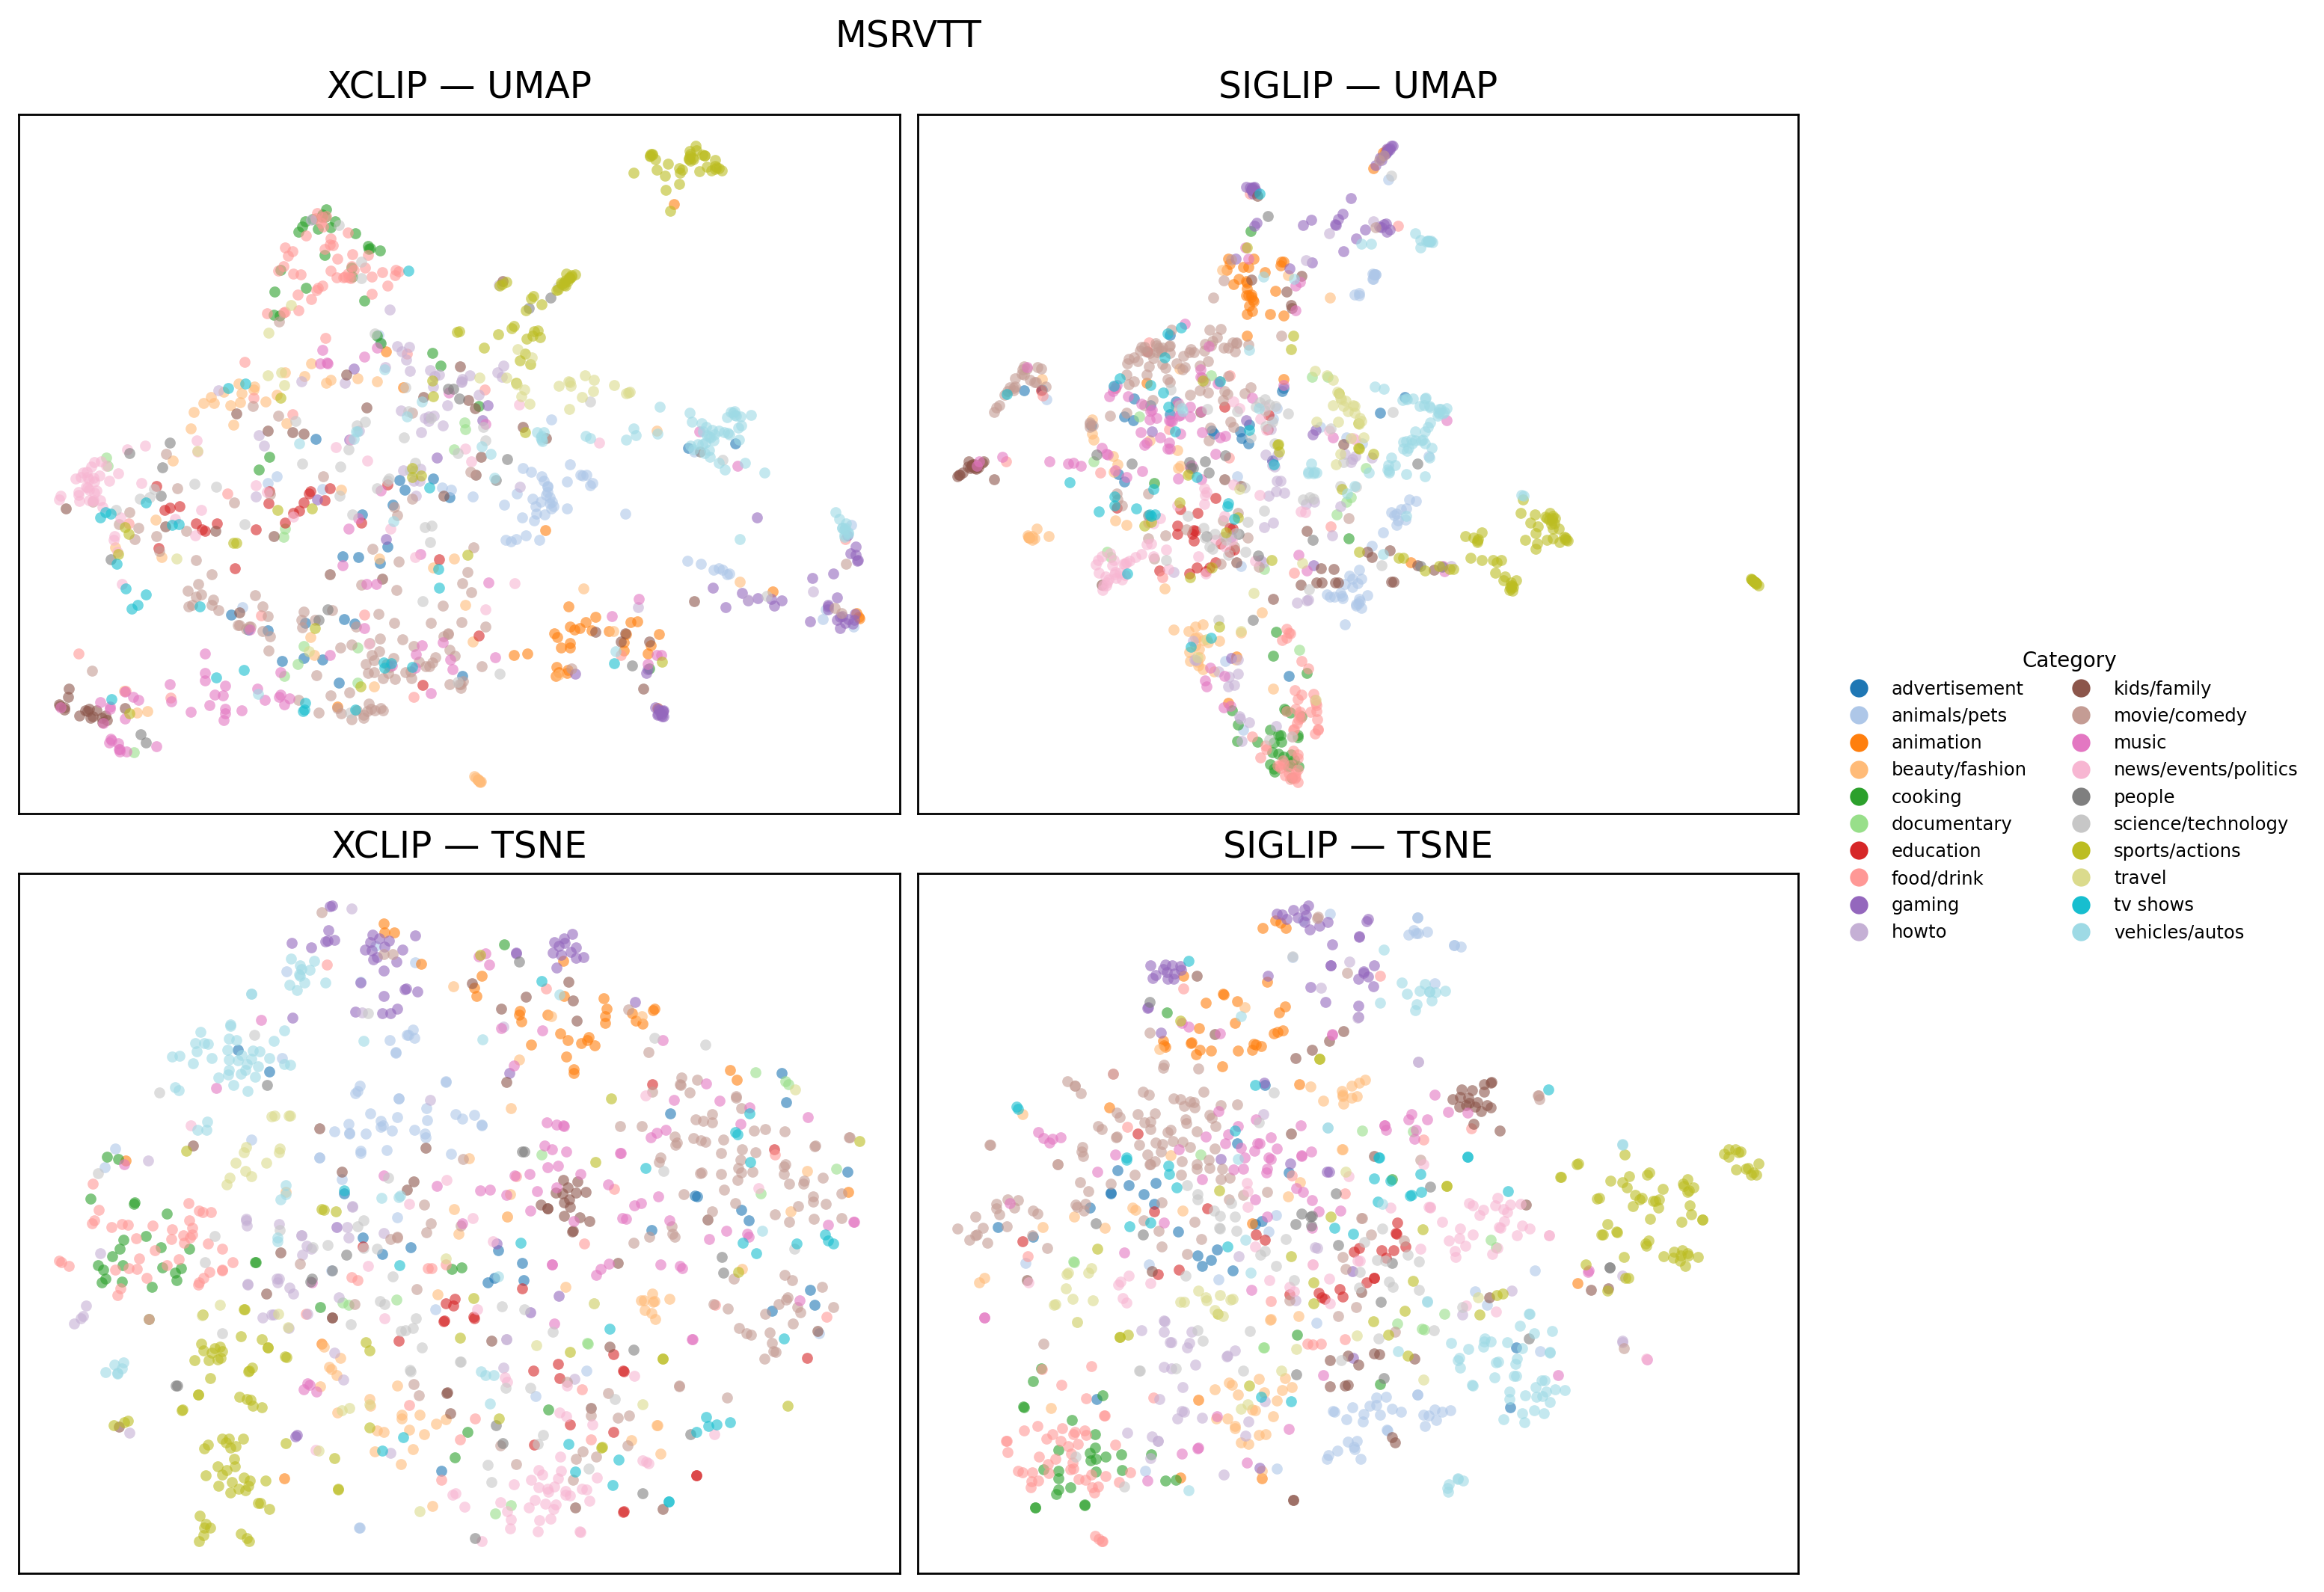

In [36]:
from pathlib import Path
import numpy as np

from src.data_loader import load_dataset_embeddings
from src.visualization import visualize_tsne, visualize_umap

# same mapping you used in the notebook [file:1]
DIRS = {"xclip": "clip", "siglip": "clip", "qwen3": "vlm", "videomae": "video-mae"}
EMBED_DIR = "./embedings/"

def build_xy_dict(dataset, models, methods=("umap", "tsne"), perplexity=30, n_neighbors=15):
    xy_dict = {}
    categories_ref = None

    for model in models:
        embed_dir = Path(EMBED_DIR) / DIRS[model]
        video_embs, text_embs, categories, df = load_dataset_embeddings(str(embed_dir) + "/", dataset, model)

        # NOTE: use video embeddings for visualization, like your original plot() [file:1]
        X = video_embs

        if categories_ref is None:
            categories_ref = categories
        else:
            # sanity check: assumes same ordering/length across models for the same dataset
            assert len(categories_ref) == len(categories)

        for method in methods:
            if method == "umap":
                xy = visualize_umap(X, n_neighbors=n_neighbors)
            elif method == "tsne":
                xy = visualize_tsne(X, perplexity=perplexity)
            else:
                raise ValueError(method)

            xy_dict[(model, method)] = xy

    return xy_dict, categories_ref


dataset = "msrvtt"
models = ("xclip", "siglip")
methods = ("umap", "tsne")

xy_dict, categories = build_xy_dict(
    dataset=dataset,
    models=models,
    methods=methods,
    perplexity=30,
    n_neighbors=15,
)

fig = plot_grid_with_one_legend(
    xy_dict=xy_dict,
    categories=categories,
    models=models,
    methods=methods,
    dataset=dataset,
    save_path="plots/grids/msrvtt_clip_grid_one_legend.png",
)


/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


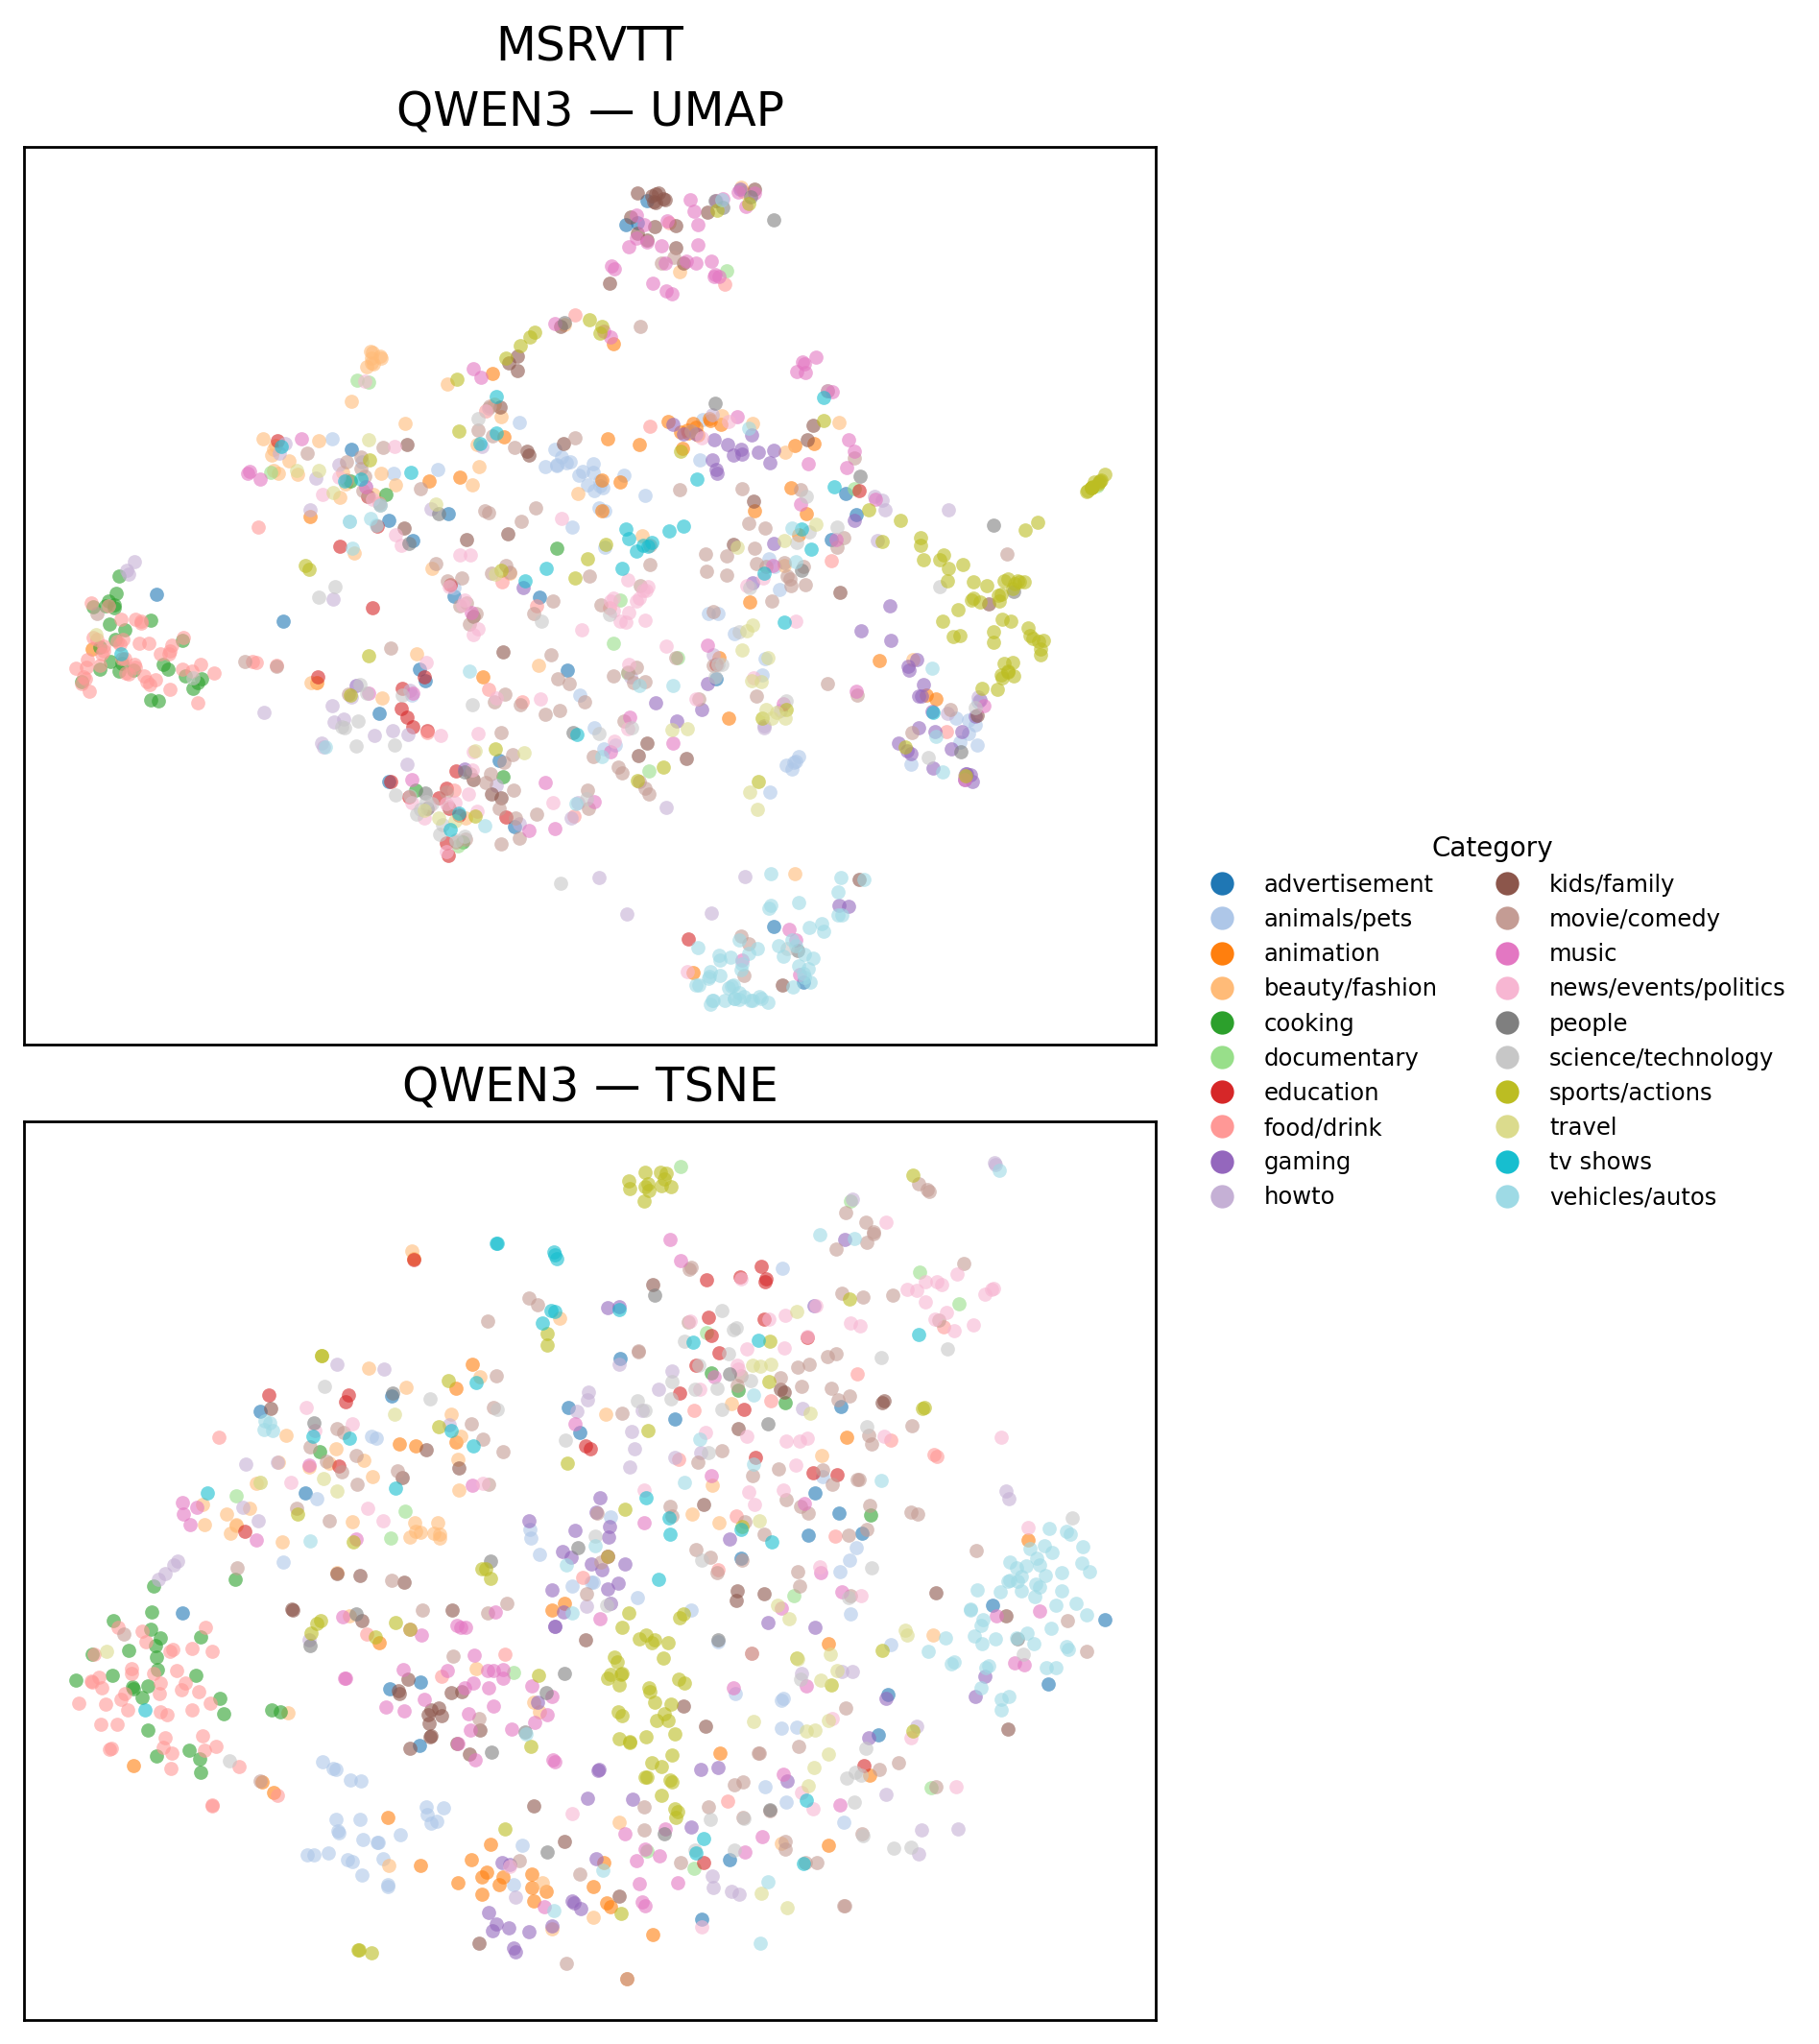

In [40]:
dataset = "msrvtt"
models = ("qwen3",)
methods = ("umap", "tsne")

xy_dict, categories = build_xy_dict(
    dataset=dataset,
    models=models,
    methods=methods,
    perplexity=30,
    n_neighbors=15,
)

fig = plot_grid_with_one_legend(
    xy_dict=xy_dict,
    categories=categories,
    models=models,
    methods=methods,
    dataset=dataset,
    save_path="plots/grids/msrvtt_qwen_grid_one_legend.png",
)

/home/stasmikhaylov/clipteka/baseline/video-retrieval-baseline/venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


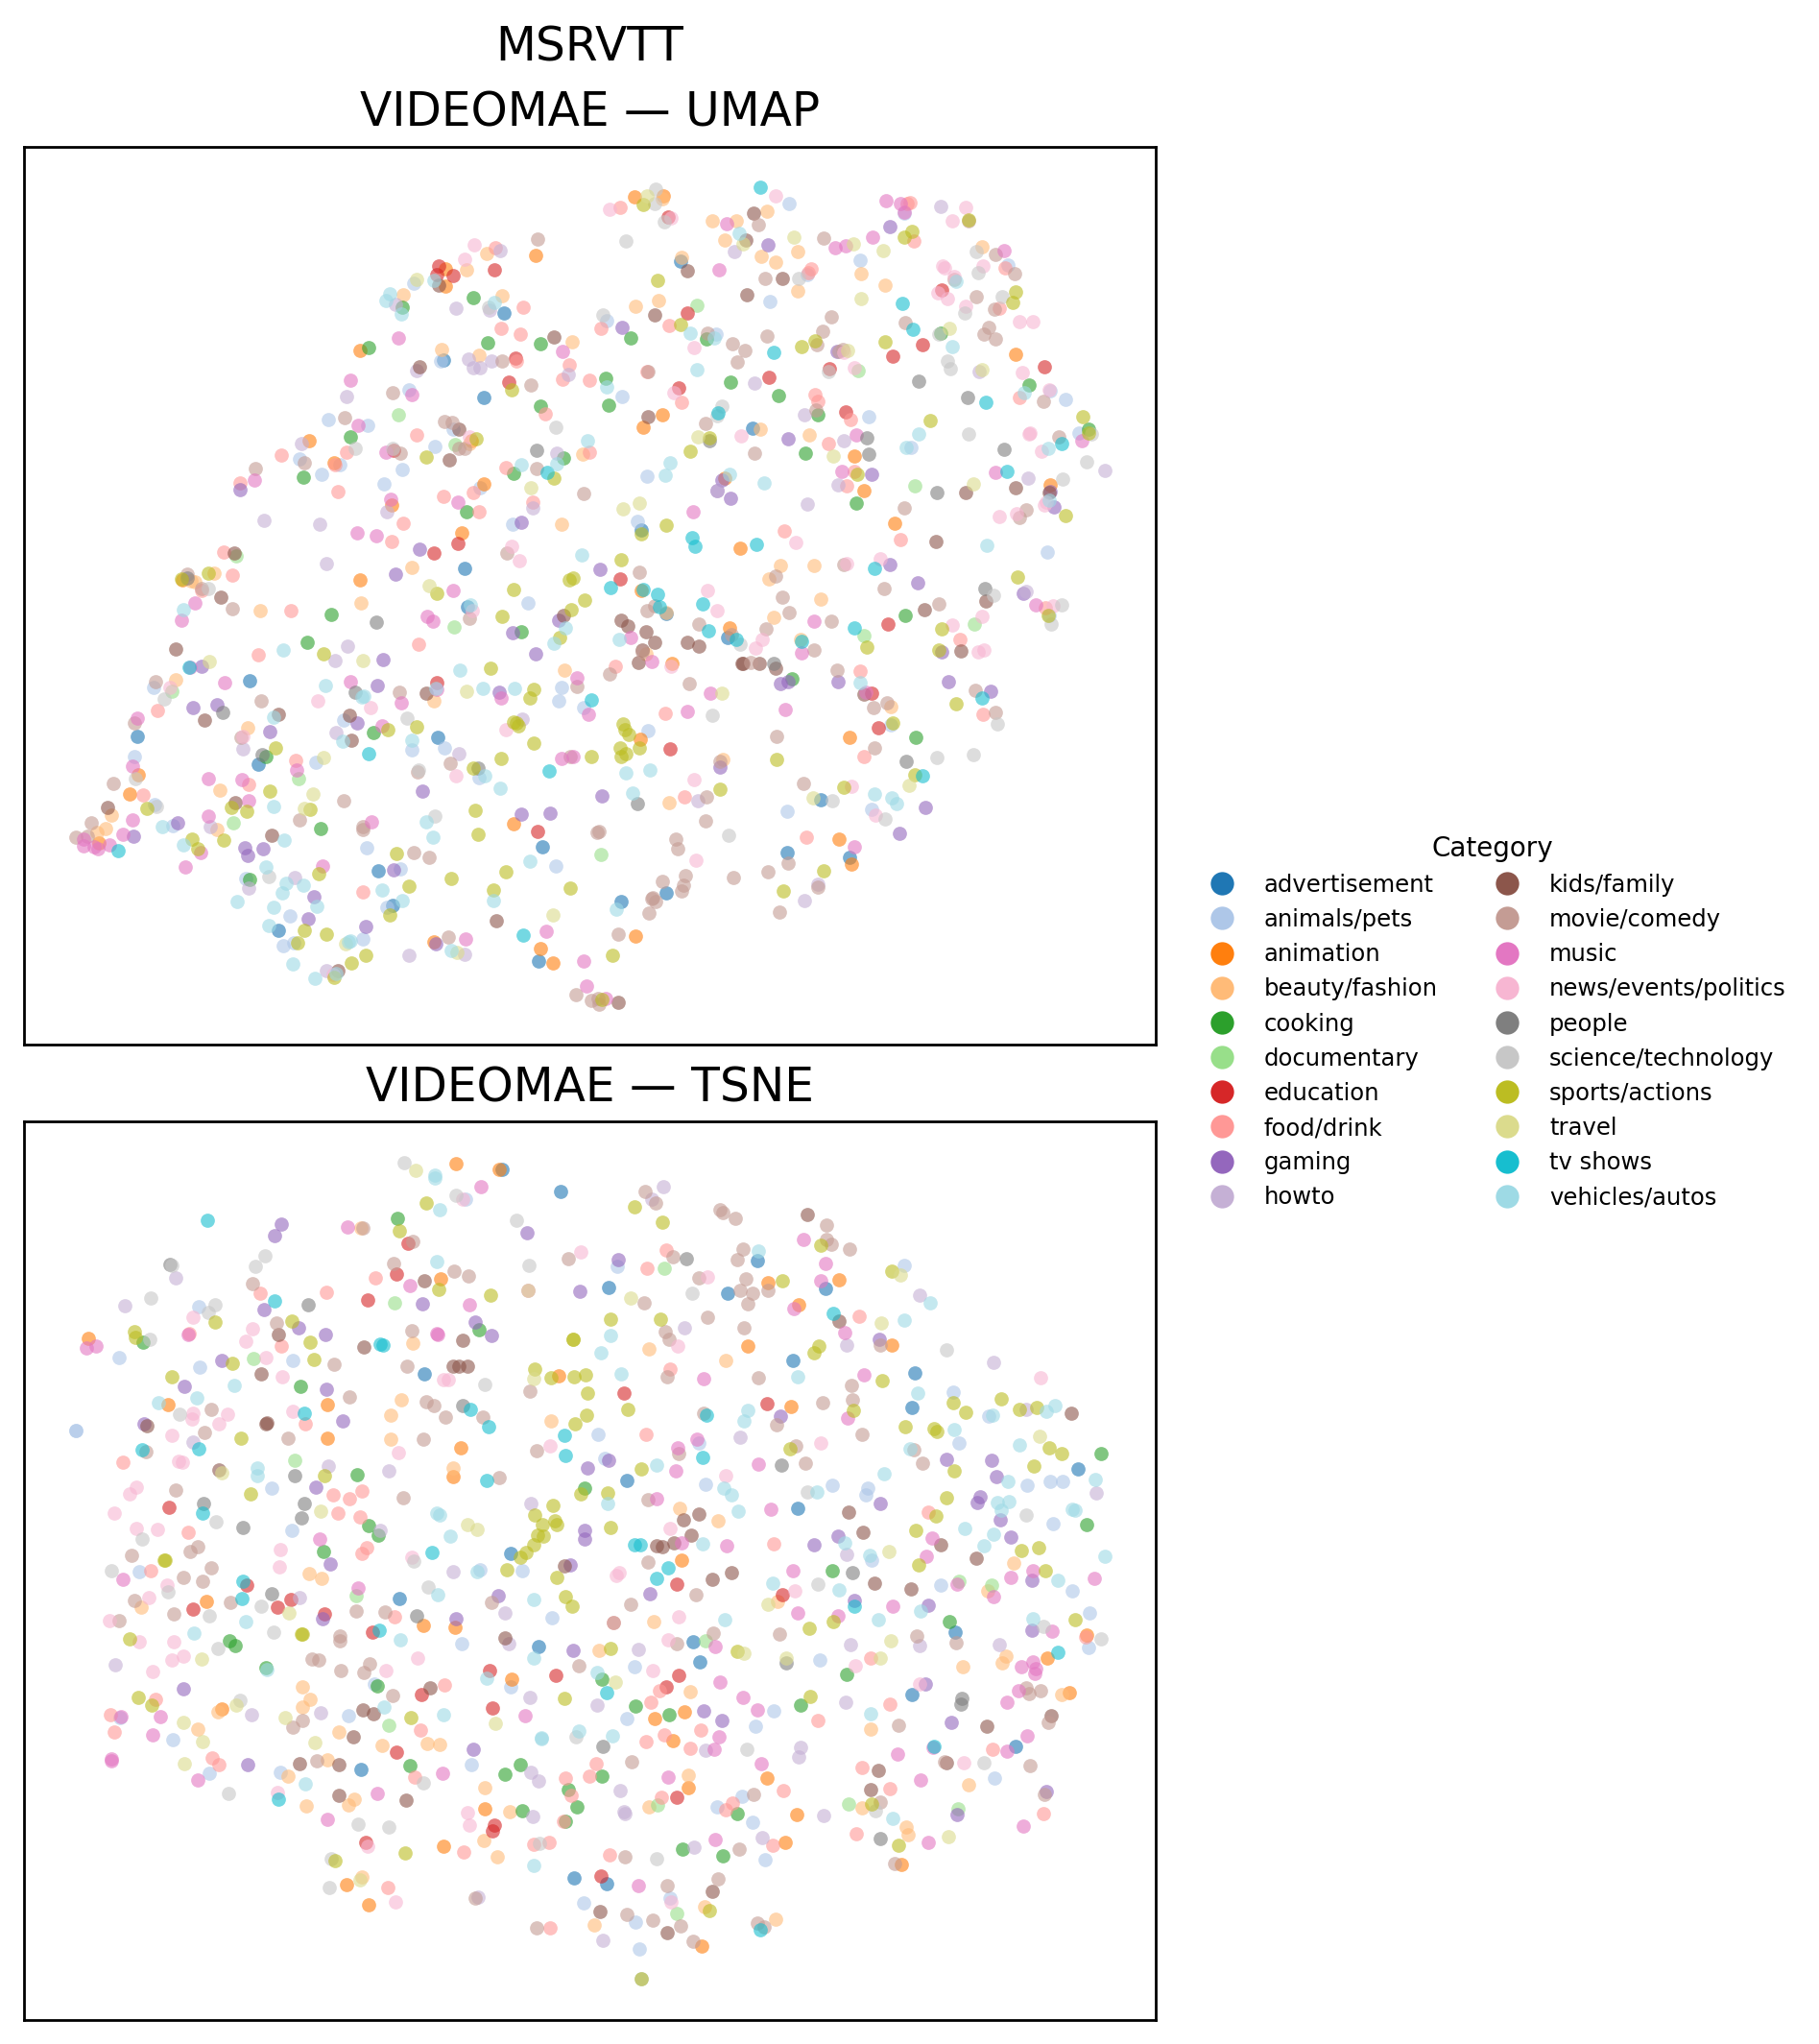

In [39]:
dataset = "msrvtt"
models = ("videomae",)
methods = ("umap", "tsne")

xy_dict, categories = build_xy_dict(
    dataset=dataset,
    models=models,
    methods=methods,
    perplexity=30,
    n_neighbors=15,
)

fig = plot_grid_with_one_legend(
    xy_dict=xy_dict,
    categories=categories,
    models=models,
    methods=methods,
    dataset=dataset,
    save_path="plots/grids/msrvtt_videomae_grid_one_legend.png",
)

## Оценка

*   **Задача 5.1: Оценка задачи Video Retrieval**
    *   Используя эмбеддинги из Модулей 2 и 3, провести эксперимент по поиску видео по текстовому запросу.
    *   Реализовать расчет метрик Recall@K и Median Rank.

In [15]:
for model in ["xclip", "siglip", "qwen3"]:
    for dataset in ["vatex", "msrvtt", "youcook2"]:
        whatup(model, dataset, mode="retrieval")


Dataset: VATEX | Model: XCLIP

--- Retrieval Metrics ---
R@1: 0.1561
R@5: 0.3409
R@10: 0.3963
MedR: 11.0000
SoftMedR: 5.6589
MAP: 0.2316
MRR: 0.2316
NDCG@1: 0.1561
NDCG@5: 0.2910
NDCG@10: 0.3102


Dataset: MSRVTT | Model: XCLIP

--- Retrieval Metrics ---
R@1: 0.0941
R@5: 0.2082
R@10: 0.2723
MedR: 11.0000
SoftMedR: 5.6462
MAP: 0.1428
MRR: 0.1428
NDCG@1: 0.0941
NDCG@5: 0.1743
NDCG@10: 0.1962


Dataset: YOUCOOK2 | Model: XCLIP

--- Retrieval Metrics ---
R@1: 0.0620
R@5: 0.1640
R@10: 0.2280
MedR: 11.0000
SoftMedR: 5.6206
MAP: 0.1053
MRR: 0.1053
NDCG@1: 0.0620
NDCG@5: 0.1316
NDCG@10: 0.1532


Dataset: VATEX | Model: SIGLIP

--- Retrieval Metrics ---
R@1: 0.6478
R@5: 0.8840
R@10: 0.9302
MedR: 1.0000
SoftMedR: 5.9859
MAP: 0.7458
MRR: 0.7458
NDCG@1: 0.6478
NDCG@5: 0.8300
NDCG@10: 0.8462


Dataset: MSRVTT | Model: SIGLIP

--- Retrieval Metrics ---
R@1: 0.4004
R@5: 0.6286
R@10: 0.7137
MedR: 2.0000
SoftMedR: 5.8508
MAP: 0.4996
MRR: 0.4996
NDCG@1: 0.4004
NDCG@5: 0.5747
NDCG@10: 0.6041


Dataset: 